In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os


sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_loading import fetch_data, preprocess_data
from eda import (
    plot_closing_prices,
    calculate_and_plot_daily_returns,
    calculate_and_plot_rolling_volatility,
    perform_adf_test,
    calculate_sharpe_ratio,
    calculate_var
)

plt.style.use('fivethirtyeight')

print("Libraries imported and style set successfully!")

Libraries imported and style set successfully!


In [2]:
# Defining tickers, date range, and file path for the data
TICKERS = ['TSLA', 'BND', 'SPY']
START_DATE = '2015-07-01'
END_DATE = '2025-07-31'
RAW_DATA_PATH = '../data/raw_financial_data.csv'

In [3]:
# Fetch raw data from yfinance
raw_data = fetch_data(TICKERS, START_DATE, END_DATE, RAW_DATA_PATH)

# Preprocess the data to get clean adjusted close prices
adj_close_prices = preprocess_data(raw_data)

# Save the processed data
adj_close_prices.to_csv('../data/processed_adj_close_prices.csv')

print("\nProcessed Data Head:")
display(adj_close_prices.head())

Fetching data for ['TSLA', 'BND', 'SPY'] from 2015-07-01 to 2025-07-31...


[*********************100%***********************]  3 of 3 completed


Raw data saved to ../data/raw_financial_data.csv
Preprocessing data...
Missing values before cleaning:
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

Missing values after cleaning:
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64
Data preprocessing complete.

Processed Data Head:


/home/fua/Documents/GMF_TimeSeries_Project/src/data_loading.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close.fillna(method='ffill', inplace=True)


Ticker,BND,SPY,TSLA
Date,,,
2015-07-01,60.816715,174.917068,17.943333
2015-07-02,60.967094,174.756973,18.667999
2015-07-06,61.177578,174.259598,18.648001
2015-07-07,61.237713,175.355484,17.858667
2015-07-08,61.410595,172.413452,16.997334


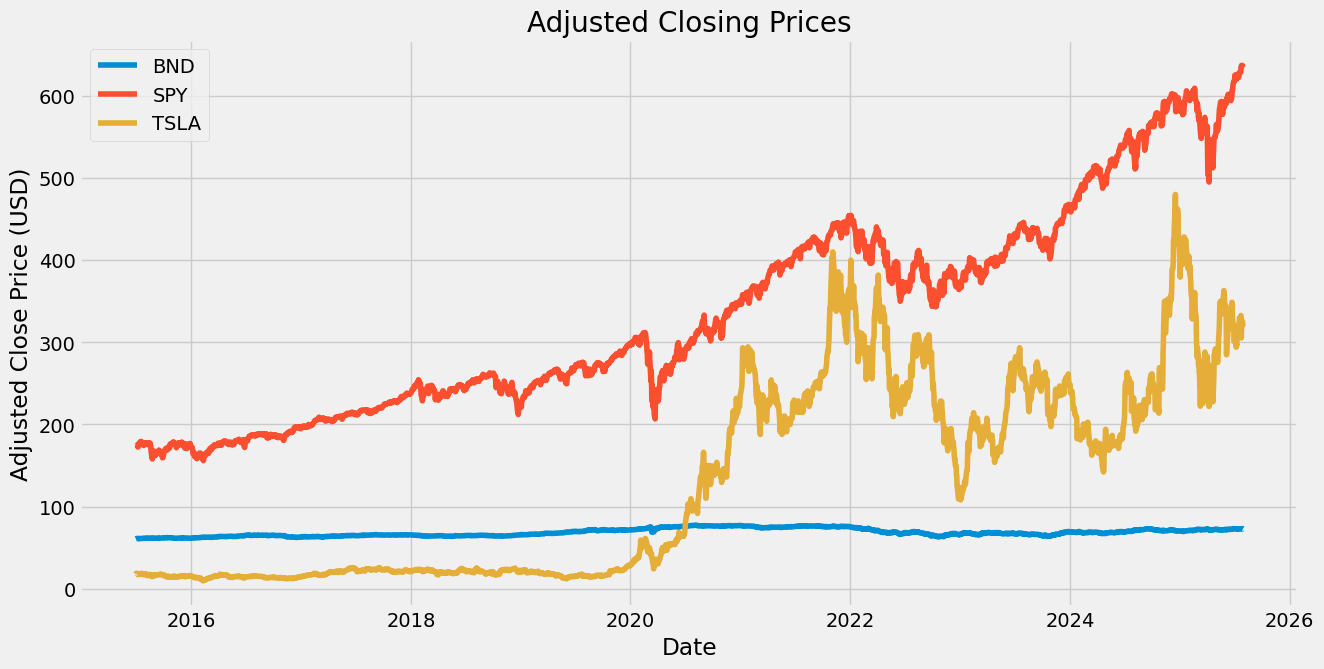

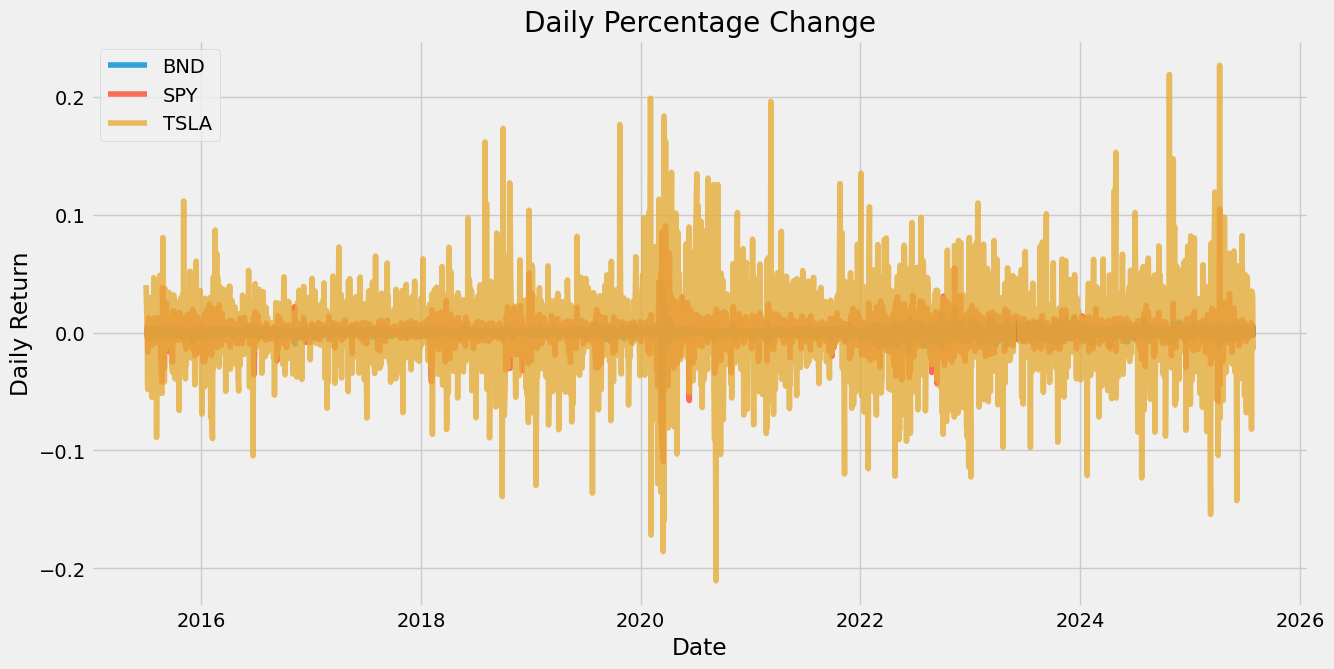

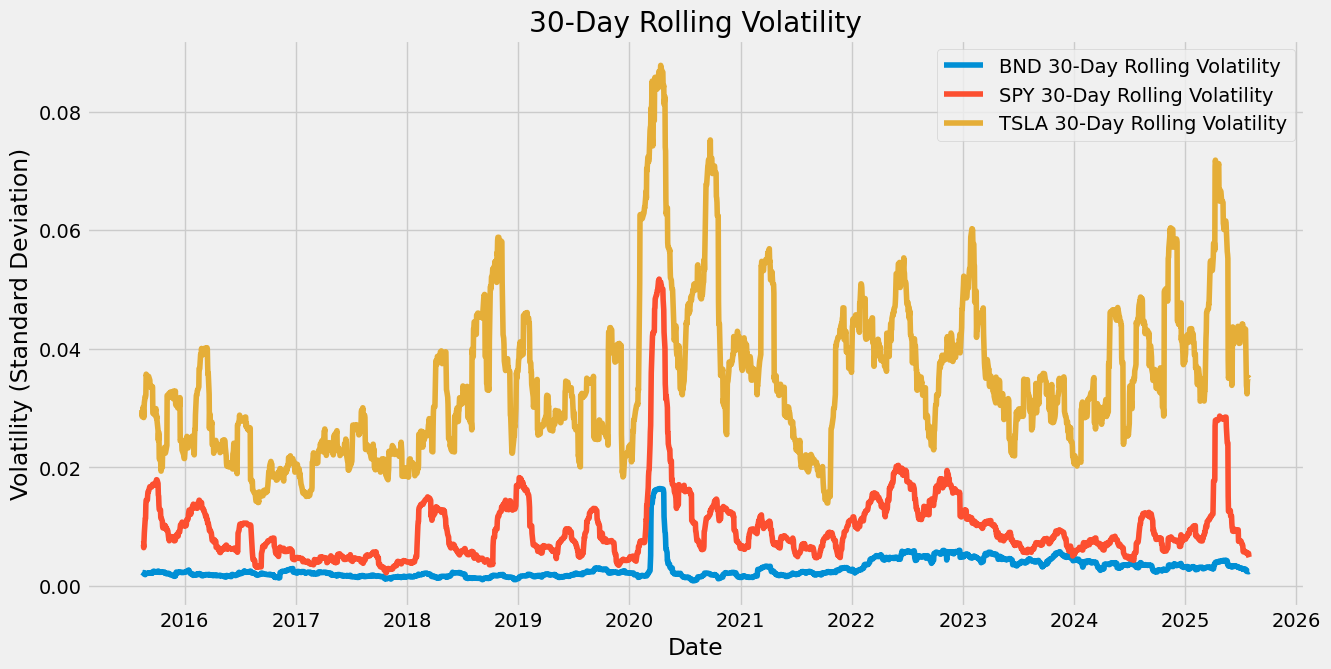

In [4]:
# Plot the adjusted closing prices
plot_closing_prices(adj_close_prices)

# Calculate and plot the daily returns
daily_returns = calculate_and_plot_daily_returns(adj_close_prices)

# Calculate and plot the 30-day rolling volatility
calculate_and_plot_rolling_volatility(daily_returns)

In [5]:
# Test for stationarity on the closing prices
for ticker in TICKERS:
    perform_adf_test(adj_close_prices[ticker], f'{ticker} Adjusted Close Price')

# Test for stationarity on the daily returns
for ticker in TICKERS:
    perform_adf_test(daily_returns[ticker], f'{ticker} Daily Returns')


--- Augmented Dickey-Fuller Test for TSLA Adjusted Close Price ---
ADF Statistic: -1.4189
p-value: 0.5732
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Conclusion: Fail to reject the null hypothesis. The data is likely non-stationary.

--- Augmented Dickey-Fuller Test for BND Adjusted Close Price ---
ADF Statistic: -1.5363
p-value: 0.5155
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674
Conclusion: Fail to reject the null hypothesis. The data is likely non-stationary.

--- Augmented Dickey-Fuller Test for SPY Adjusted Close Price ---
ADF Statistic: 0.6908
p-value: 0.9897
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674
Conclusion: Fail to reject the null hypothesis. The data is likely non-stationary.

--- Augmented Dickey-Fuller Test for TSLA Daily Returns ---
ADF Statistic: -34.6811
p-value: 0.0000
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674
Conclusion: Reject the null hypothesis. The data is likely stationary.

--- Augmented Dickey-Fuller Test

In [6]:
# Calculate and display the annualized Sharpe Ratio
# We assume a risk-free rate of 2% (a more realistic assumption)
sharpe_ratios = calculate_sharpe_ratio(daily_returns, risk_free_rate=0.02)

# Calculate and display the Value at Risk (VaR)
value_at_risk = calculate_var(daily_returns, confidence_level=0.95)


--- Calculating Annualized Sharpe Ratio ---
Annualized Sharpe Ratios:
Ticker
BND    -0.003715
SPY     0.685506
TSLA    0.744882
dtype: float64

--- Calculating Value at Risk (VaR) at 95% confidence level ---
Historical VaR:
BND: There is a 5% chance that the daily loss will be 0.49% or more.
SPY: There is a 5% chance that the daily loss will be 1.72% or more.
TSLA: There is a 5% chance that the daily loss will be 5.47% or more.
